In [1]:
from dotenv import dotenv_values

dotenv_data = dotenv_values('.env')
token = dotenv_data.get('IBM_TOKEN')

from qiskit_ibm_provider import IBMProvider

try:
    provider = IBMProvider(token=token)
    print("Successfully authenticated with IBM Quantum.")
except Exception as e:
    print("Error:", e)

Successfully authenticated with IBM Quantum.


In [2]:
from qiskit import QuantumCircuit
import numpy as np

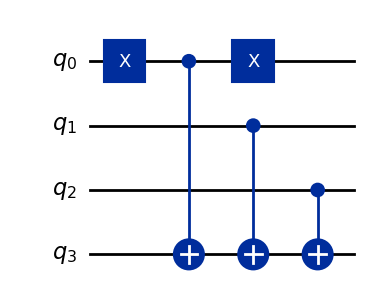

In [9]:
# Balanced oracle
def balanced_oracle():
    balanced_oracle = QuantumCircuit(4, name='balanced oracle$_\omega$')
    
    b = np.random.randint(1,2**4-1)
    b_str = format(b, '0'+str(3)+'b')
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            balanced_oracle.x(qubit)
    
    for qubit in range(3):
        balanced_oracle.cx(qubit, 3)
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            balanced_oracle.x(qubit)
    
    balanced_oracle.to_gate()
    return balanced_oracle

balanced_oracle().draw('mpl')

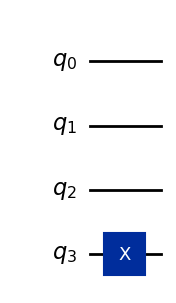

In [11]:
# Constant oracle
def constant_oracle():
    constant_oracle = QuantumCircuit(4, name='constant oracle$_\omega$')
    
    if np.random.randint(2) == 1:
        constant_oracle.x(3)
    constant_oracle.to_gate()
    return constant_oracle
    
constant_oracle().draw('mpl')

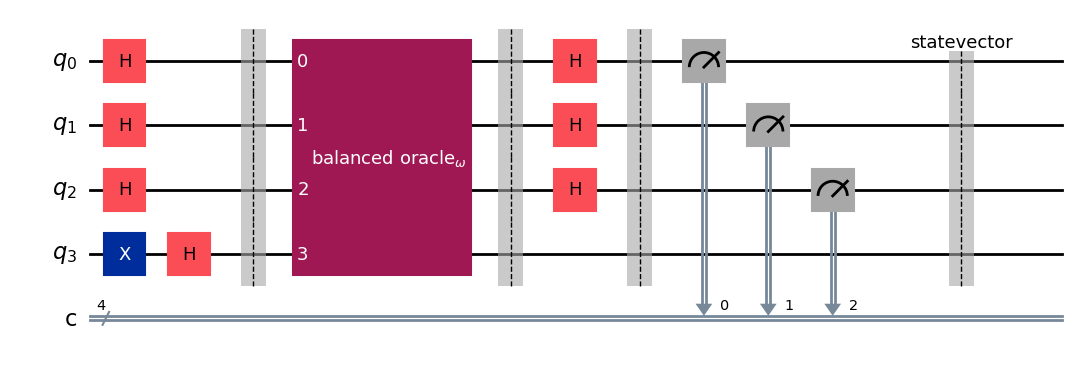

In [79]:
from qiskit.quantum_info import Statevector

circuit = QuantumCircuit(4,4)

for qbit in range(3):
    circuit.h(qbit)
circuit.x(3)
circuit.h(3)

circuit.barrier()

if np.random.randint(2) == 1:
    circuit.append(constant_oracle(), range(4))
else:
    circuit.append(balanced_oracle(), range(4))

circuit.barrier()

for qbit in range(3):
    circuit.h(qbit)
    
circuit.barrier()
circuit.measure([0,1,2], [0,1,2])
circuit.save_statevector()

circuit.draw('mpl')

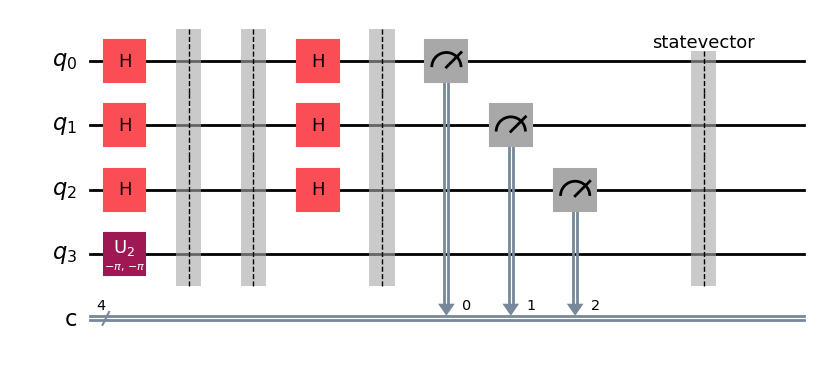

In [74]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

aersim = AerSimulator(method='statevector')

pm = generate_preset_pass_manager(backend=aersim, optimization_level=3)
show_steps = pm.run(circuit)
show_steps.draw('mpl', idle_wires=False)

In [75]:
result_ideal = aersim.run(show_steps, shots=500).result()
data = result_ideal.get_counts(show_steps)

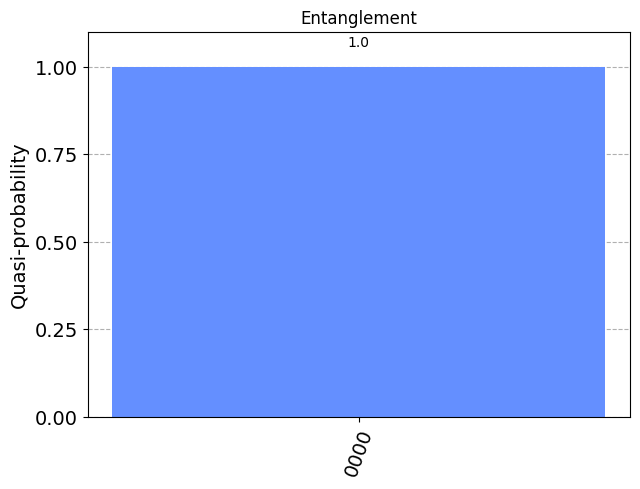

In [76]:
from qiskit.visualization import plot_histogram

total_counts = sum(data.values())
probabilities = {key: value / total_counts for key, value in data.items()}

plot_histogram(probabilities, title='Entanglement')

In [77]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

psi  = result_ideal.get_statevector(show_steps)

psi.draw(output = 'latex')

<IPython.core.display.Latex object>

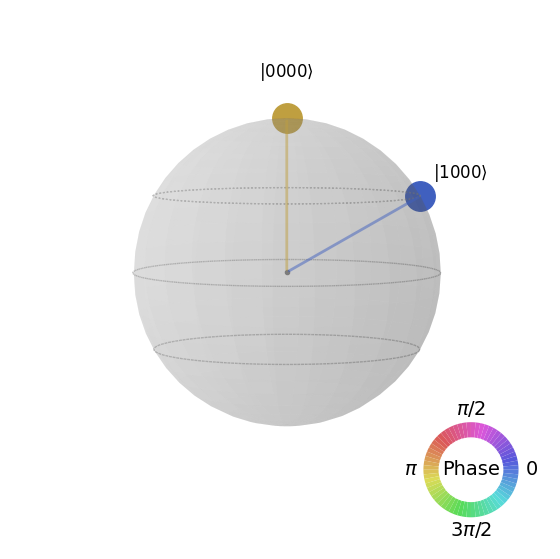

In [78]:
plot_state_qsphere(psi)